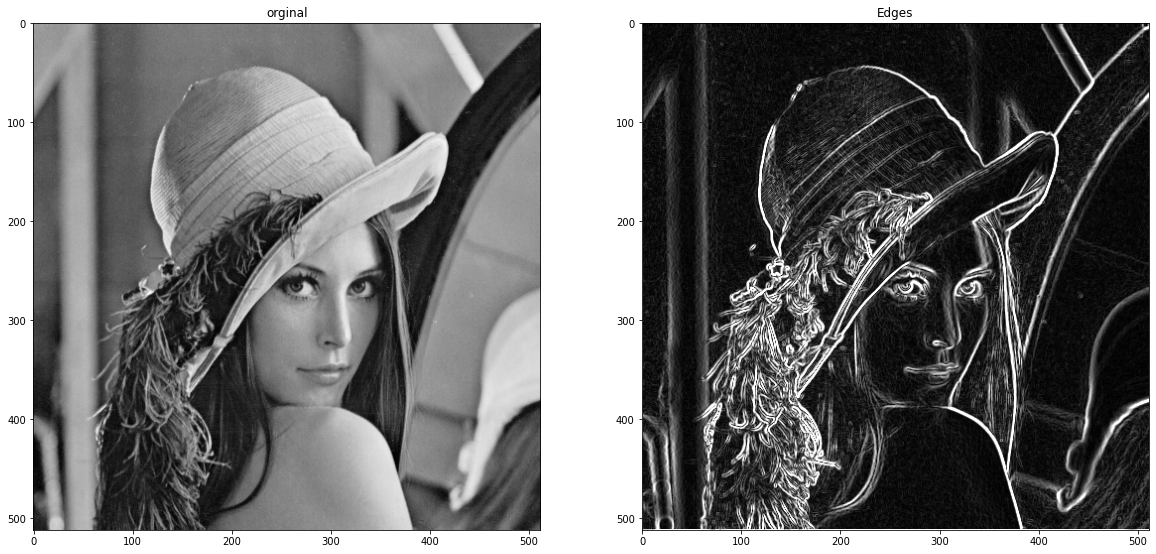

In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
path=input("entyer absolute path to the file")
#reading grascale values
imgGray=cv2.imread(path,0)
row,col=imgGray.shape
imgPadded=np.zeros((row+2,col+2),dtype=np.uint8)
imgPadded[1:row+1,1:col+1]=imgGray
#kernel whichh is used
sx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

imgNew=np.zeros((row,col),dtype=np.uint8)
#convolution operation
for i in range(0,row):
    for j in range(0,col):
        tx=np.sum(imgPadded[i:i+3,j:j+3]*sx)
        ty=np.sum(imgPadded[i:i+3,j:j+3]*sy)
        imgNew[i,j]=min(round(math.sqrt((tx**2)+(ty**2))),255)
#plotting images
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(imgGray,cmap='gray')
plt.title("orginal")
plt.subplot(1,2,2)
plt.imshow(imgNew,cmap='gray')
plt.title("Edges")
plt.show()